<a href="https://colab.research.google.com/github/Amirhosseinpoor/AI_Course/blob/main/HW1/AI_HW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib scikit-learn seaborn ace_tools

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                  5.1               3.5                1.4               0.2        0
1                  4.9               3.0                1.4               0.2        0
2                  4.7               3.2                1.3               0.2        0
3                  4.6               3.1                1.5               0.2        0
4                  5.0               3.6                1.4               0.2        0
..                 ...               ...                ...               ...      ...
145                6.7               3.0                5.2               2.3        2
146                6.3               2.5                5.0               1.9        2
147                6.5               3.0                5.2               2.0        2
148                6.2               3.4                5.4               2.3        2
149                5.9               3.0   

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df =train_test_split(df, test_size=0.2, random_state=42)
train_df['dataset_type'] = 'train'
test_df['dataset_type'] = 'test'
print(train_df)
print(test_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species dataset_type
22                 4.6               3.6                1.0               0.2        0        train
15                 5.7               4.4                1.5               0.4        0        train
65                 6.7               3.1                4.4               1.4        1        train
11                 4.8               3.4                1.6               0.2        0        train
42                 4.4               3.2                1.3               0.2        0        train
..                 ...               ...                ...               ...      ...          ...
71                 6.1               2.8                4.0               1.3        1        train
106                4.9               2.5                4.5               1.7        2        train
14                 5.8               4.0                1.2               0.2        0        train


In [ ]:
import pandas as pd
final_df = pd.concat([train_df,test_df])
print(final_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species dataset_type
22                 4.6               3.6                1.0               0.2        0        train
15                 5.7               4.4                1.5               0.4        0        train
65                 6.7               3.1                4.4               1.4        1        train
11                 4.8               3.4                1.6               0.2        0        train
42                 4.4               3.2                1.3               0.2        0        train
..                 ...               ...                ...               ...      ...          ...
145                6.7               3.0                5.2               2.3        2         test
108                6.7               2.5                5.8               1.8        2         test
143                6.8               3.2                5.9               2.3        2         test


In [ ]:
final_df['species'] = final_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(final_df)

     sepal length (cm)  sepal width (cm)  ...     species  dataset_type
22                 4.6               3.6  ...      setosa         train
15                 5.7               4.4  ...      setosa         train
65                 6.7               3.1  ...  versicolor         train
11                 4.8               3.4  ...      setosa         train
42                 4.4               3.2  ...      setosa         train
..                 ...               ...  ...         ...           ...
145                6.7               3.0  ...   virginica          test
108                6.7               2.5  ...   virginica          test
143                6.8               3.2  ...   virginica          test
45                 4.8               3.0  ...      setosa          test
30                 4.8               3.1  ...      setosa          test

[150 rows x 6 columns]


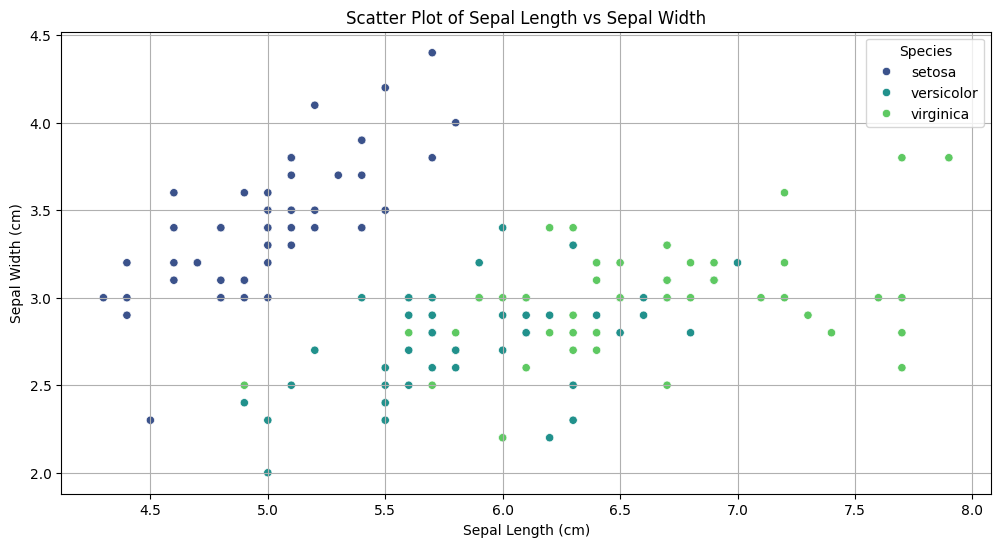

In [ ]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
seaborn.scatterplot(x=final_df['sepal length (cm)'], y=final_df['sepal width (cm)'], hue=final_df['species'], palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title="Species")
plt.grid(True)
plt.show()

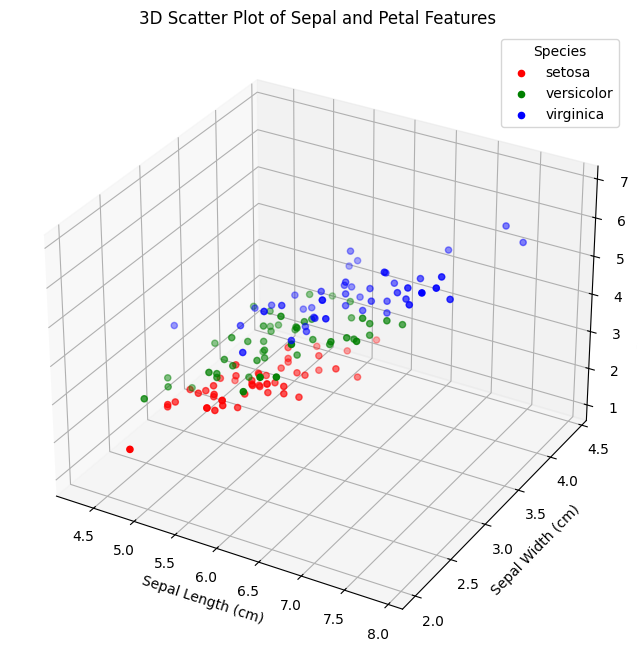

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}


for species in final_df['species'].unique():
    subset = final_df[final_df['species'] == species]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'],
               label=species, color=colors[species])

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Sepal and Petal Features')
ax.legend(title="Species")

plt.show()


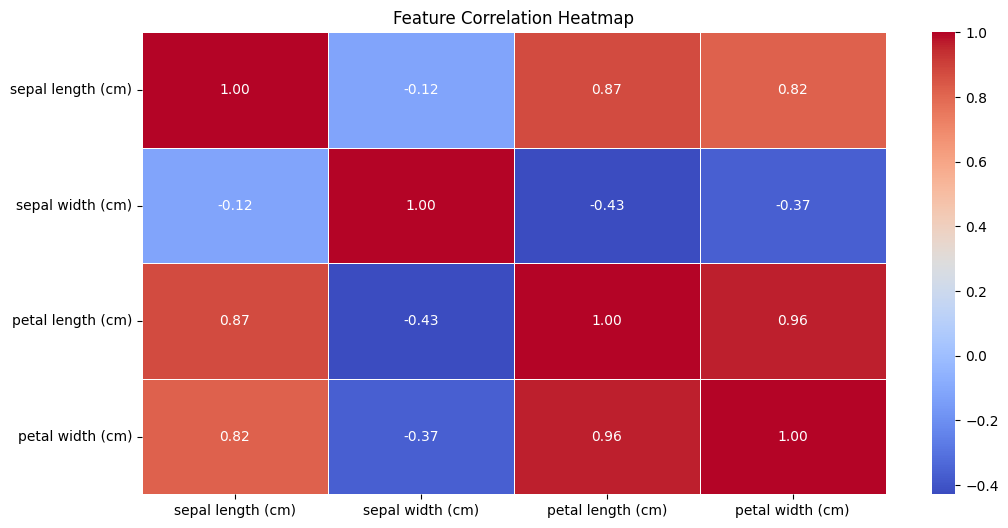

In [ ]:

corr_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(12, 6))
seaborn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



In [ ]:
features = final_df.columns[:-2]

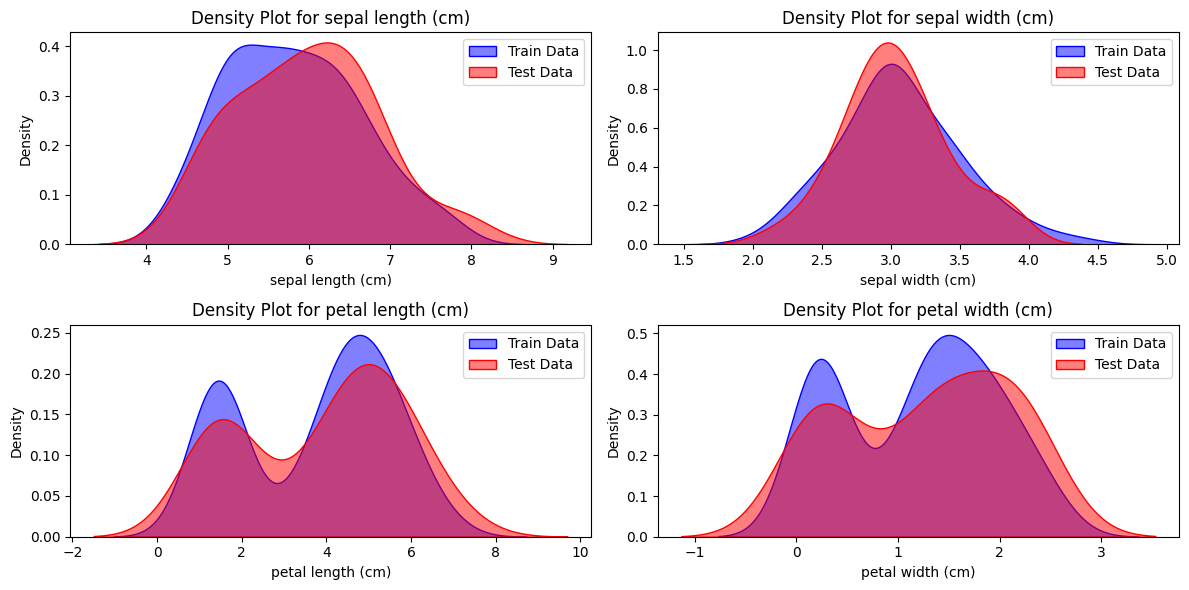

In [ ]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    seaborn.kdeplot(data=final_df[final_df['dataset_type'] == 'train'], x=feature, label="Train Data", color='blue', fill=True, alpha=0.5)
    seaborn.kdeplot(data=final_df[final_df['dataset_type'] == 'test'], x=feature, label="Test Data", color='red', fill=True, alpha=0.5)
    plt.title(f'Density Plot for {feature}')
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
feature = 'sepal length (cm)'

In [ ]:
bins = [final_df[feature].min(), 5.5, 6.5, final_df[feature].max()]
labels = ['Short', 'Medium', 'Tall']
final_df['sepal_length_category'] = pd.cut(final_df[feature], bins=bins, labels=labels, include_lowest=True)
print(final_df)

     sepal length (cm)  sepal width (cm)  ...  dataset_type  sepal_length_category
22                 4.6               3.6  ...         train                  Short
15                 5.7               4.4  ...         train                 Medium
65                 6.7               3.1  ...         train                   Tall
11                 4.8               3.4  ...         train                  Short
42                 4.4               3.2  ...         train                  Short
..                 ...               ...  ...           ...                    ...
145                6.7               3.0  ...          test                   Tall
108                6.7               2.5  ...          test                   Tall
143                6.8               3.2  ...          test                   Tall
45                 4.8               3.0  ...          test                  Short
30                 4.8               3.1  ...          test                  Short

[15

In [ ]:
setosa_df = final_df[final_df['species'] == 'setosa']
setosa_stats = setosa_df.describe()
print(setosa_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count           50.00000         50.000000          50.000000         50.000000
mean             5.00600          3.428000           1.462000          0.246000
std              0.35249          0.379064           0.173664          0.105386
min              4.30000          2.300000           1.000000          0.100000
25%              4.80000          3.200000           1.400000          0.200000
50%              5.00000          3.400000           1.500000          0.200000
75%              5.20000          3.675000           1.575000          0.300000
max              5.80000          4.400000           1.900000          0.600000
